In [6]:
import pandas as pd
df=pd.read_csv("data.csv")
print(df)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]


In [8]:
df=pd.read_csv("spotify_data.csv")
print(df)

      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1            

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
sns.set_style("darkgrid")

### LOAD DATASET

In [11]:
df=pd.read_csv("spotify_data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True) ##delete permanently.
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [8]:
df.isna().sum() ## checking for missing values.

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [9]:
df.info() ## Information about the datatypes of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [10]:
df.shape ## Number of rows and columns

(2017, 16)

In [11]:
df.columns ## LIsting out all the columns.

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [12]:
len(df.columns)

16

In [13]:
type(df.columns)

pandas.core.indexes.base.Index

In [15]:
df.describe() ## descriptive statistics

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


### DATA ANALYSIS

1. Top 5 most popular artist

In [19]:
top_five_artists = df.groupby("artist").count().sort_values(by="song_title", ascending=False)["song_title"][:5] 
top_five_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

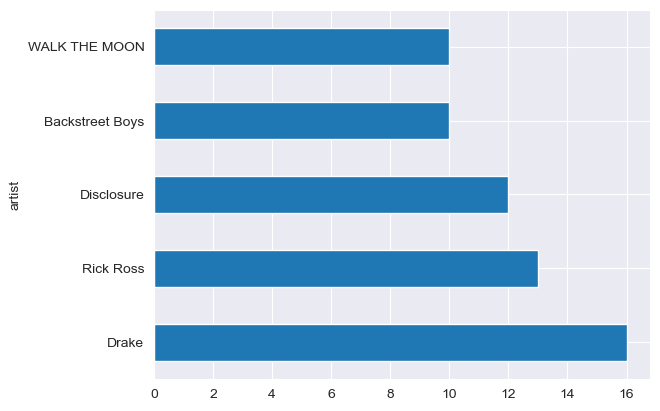

In [23]:
top_five_artists.plot.barh()
plt.show()

## TOP 5 LOUDEST SONG

In [26]:
top_five_loudest = df[["loudness","song_title"]].sort_values(by="loudness",ascending=True)[:5]
top_five_loudest

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


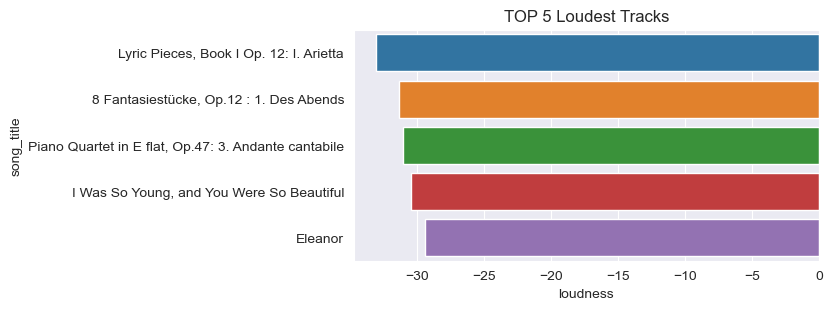

In [30]:
plt.figure(figsize=(6,3))
sns.barplot(x="loudness", y="song_title", data = top_five_loudest)
plt.title("TOP 5 Loudest Tracks")
plt.show()

### TOP 5 MOST DANCEABILITY SONGS

In [31]:
top_five_danceable_songs=df[["danceability","song_title","artist"]].sort_values(by="danceability", ascending=False)[:5]
top_five_danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


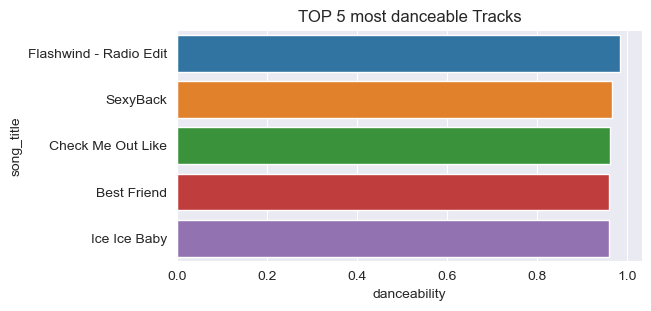

In [37]:
plt.figure(figsize=(6,3))
sns.barplot(x="danceability", y="song_title", data = top_five_danceable_songs)
plt.title("TOP 5 most danceable Tracks")
plt.show()

### TOP 10 Instrumentalness

In [45]:
top_ten_instrumentalness = df[["instrumentalness","song_title","artist"]].sort_values(by="instrumentalness", ascending=False)[:10]
top_ten_instrumentalness

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje
1546,0.956,Almas vaggvisa,Jan Lundgren Trio
1322,0.955,Pitchblack,Walking Dead On Broadway
1349,0.954,Prismatic Abyss,Aversions Crown
1661,0.954,Yebisah,Mark Knight
121,0.952,Chasing Heaven,Bassnectar


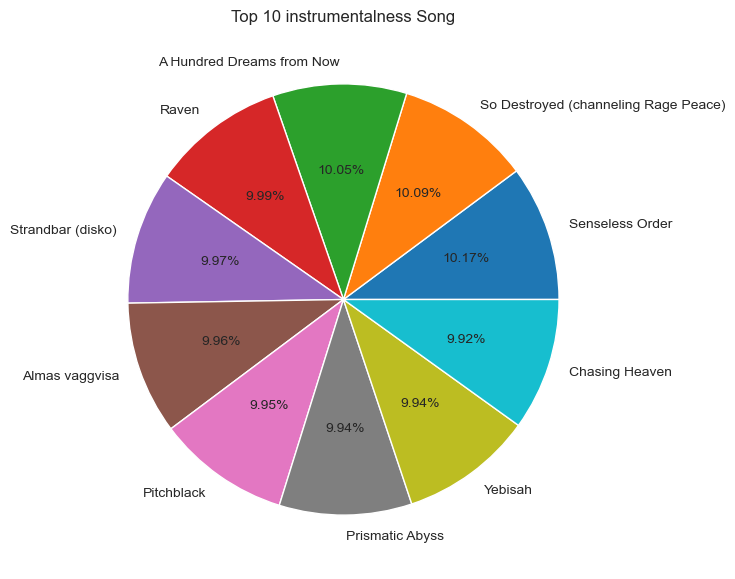

In [52]:
plt.figure(figsize=(12,7))
plt.pie(x="instrumentalness", data = top_ten_instrumentalness, autopct="%1.2f%%", labels=top_ten_instrumentalness.song_title)
plt.title("Top 10 instrumentalness Song")
plt.show()

/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label='Positive', color='green') #hist
/Users/karunwiokikioluwa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

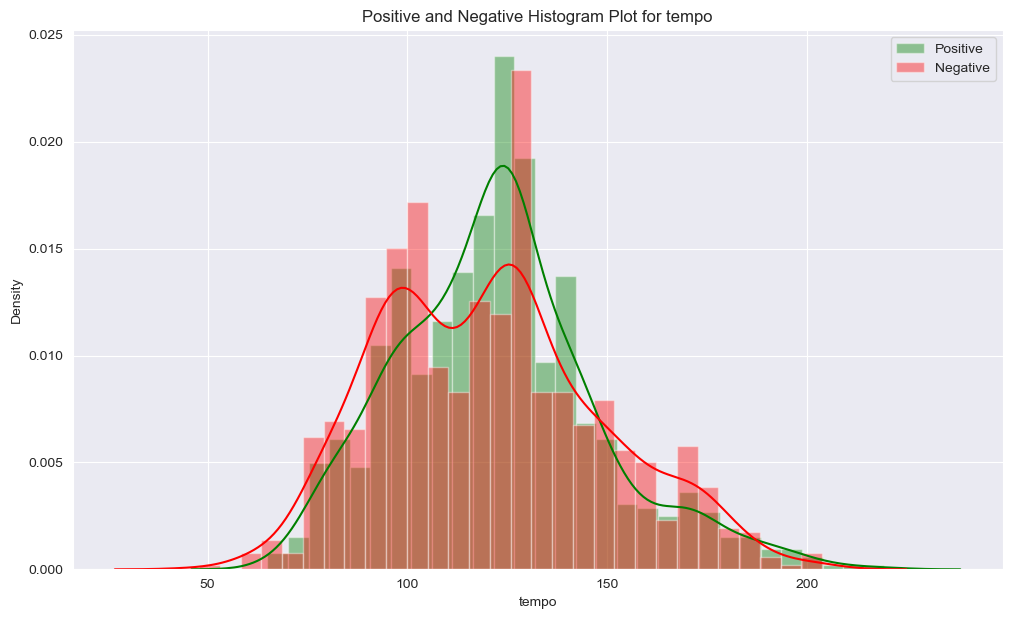

/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label='Positive', color='green') #hist
/Users/karunwiokikioluwa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

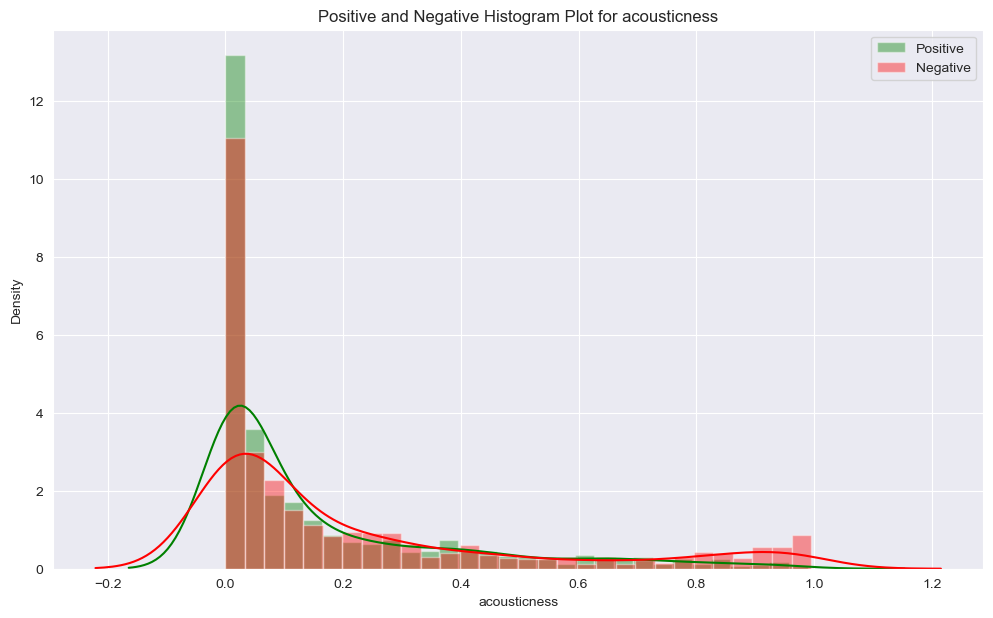

/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label='Positive', color='green') #hist
/Users/karunwiokikioluwa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

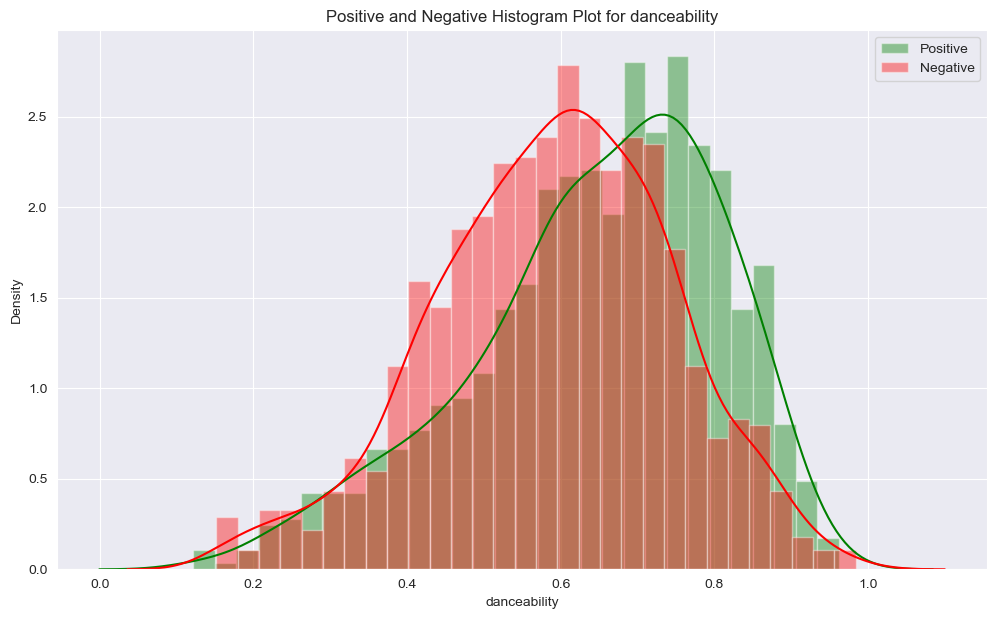

/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label='Positive', color='green') #hist
/Users/karunwiokikioluwa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

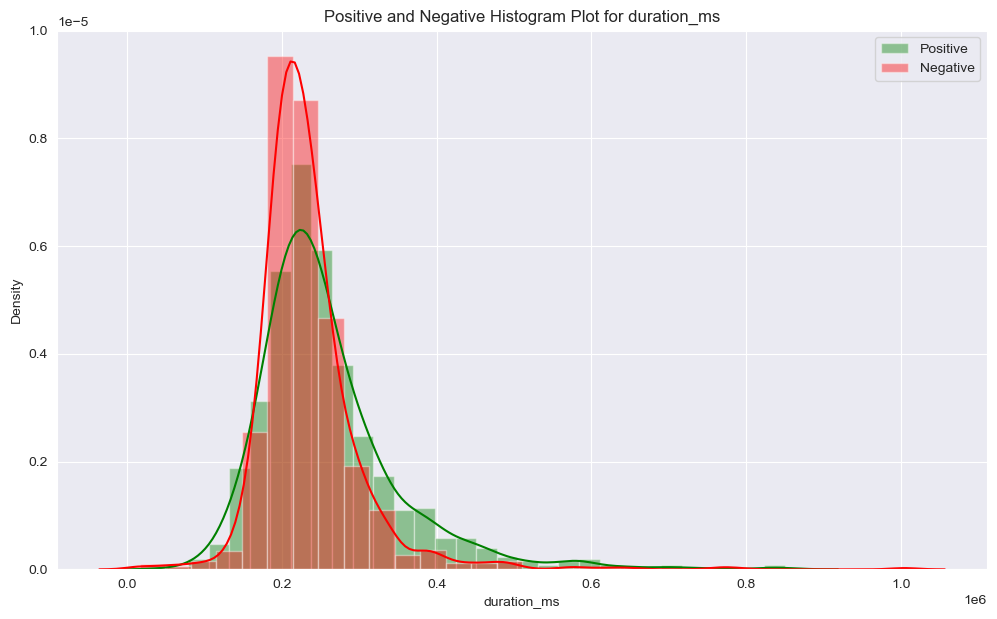

/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label='Positive', color='green') #hist
/Users/karunwiokikioluwa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

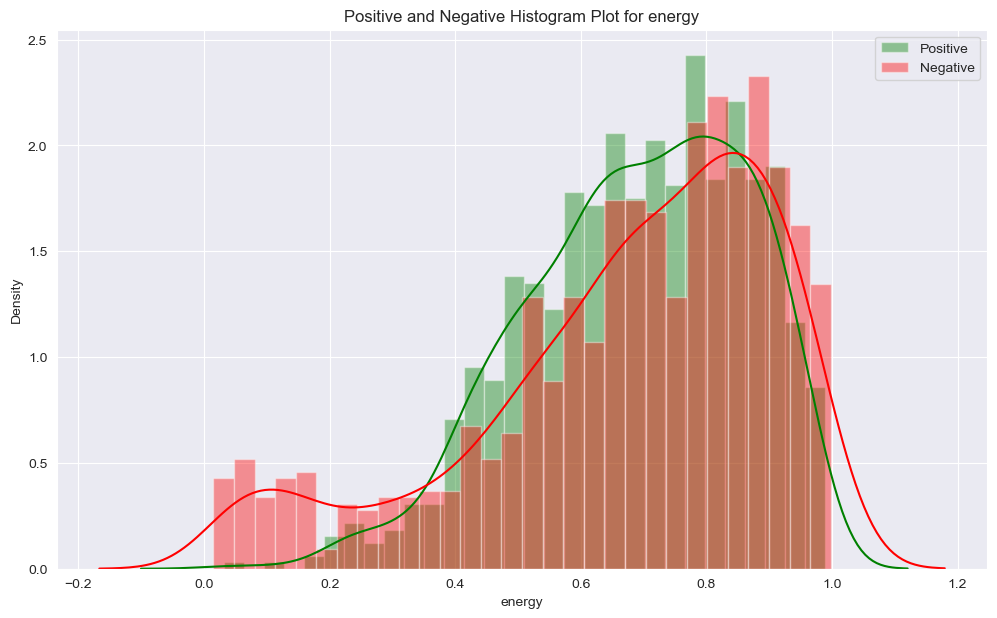

/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label='Positive', color='green') #hist
/Users/karunwiokikioluwa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

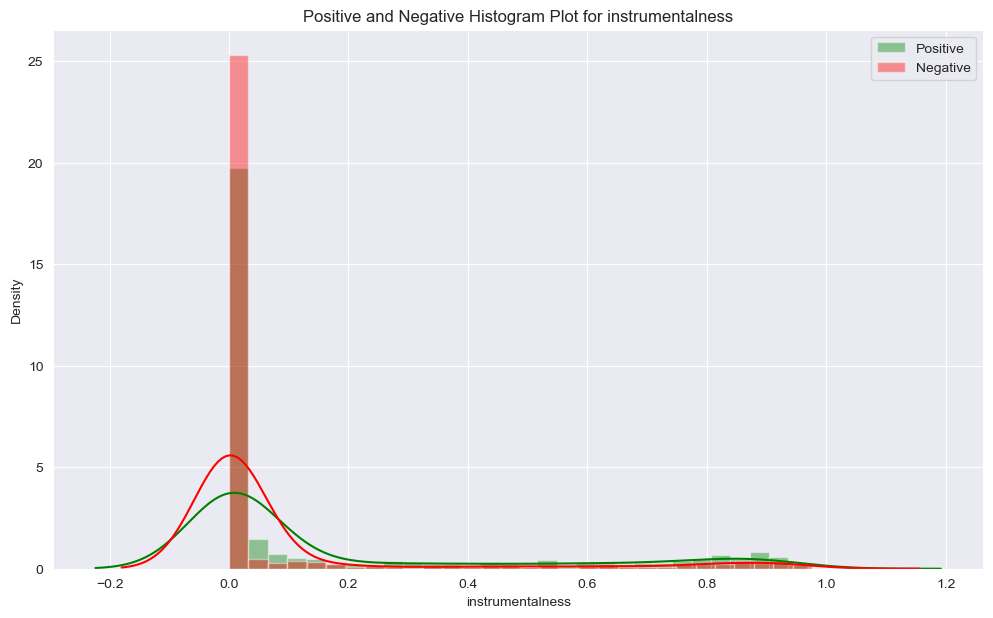

/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label='Positive', color='green') #hist
/Users/karunwiokikioluwa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

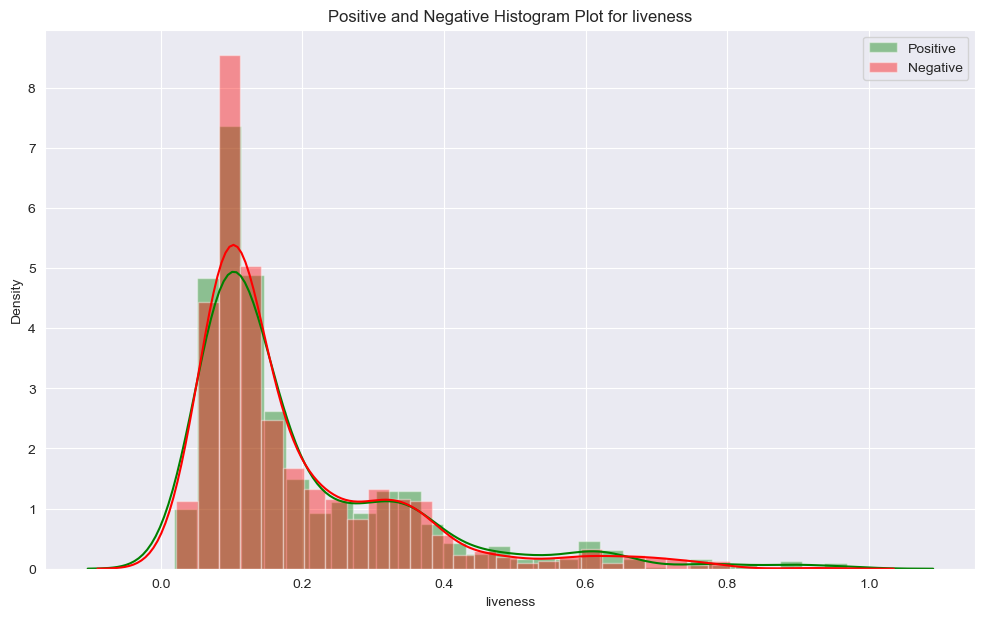

/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label='Positive', color='green') #hist
/Users/karunwiokikioluwa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

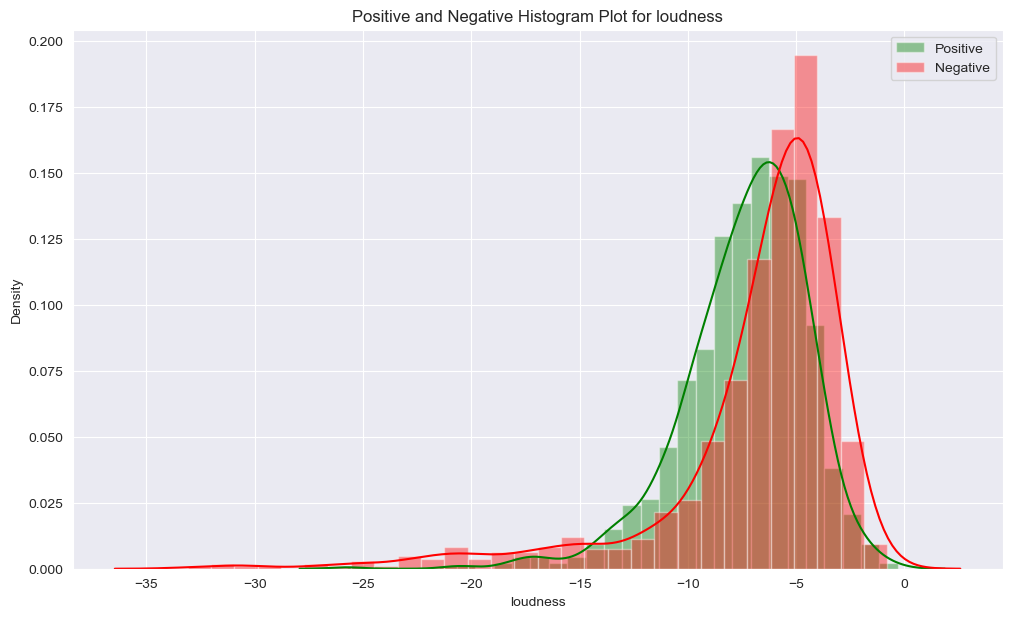

/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label='Positive', color='green') #hist
/Users/karunwiokikioluwa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

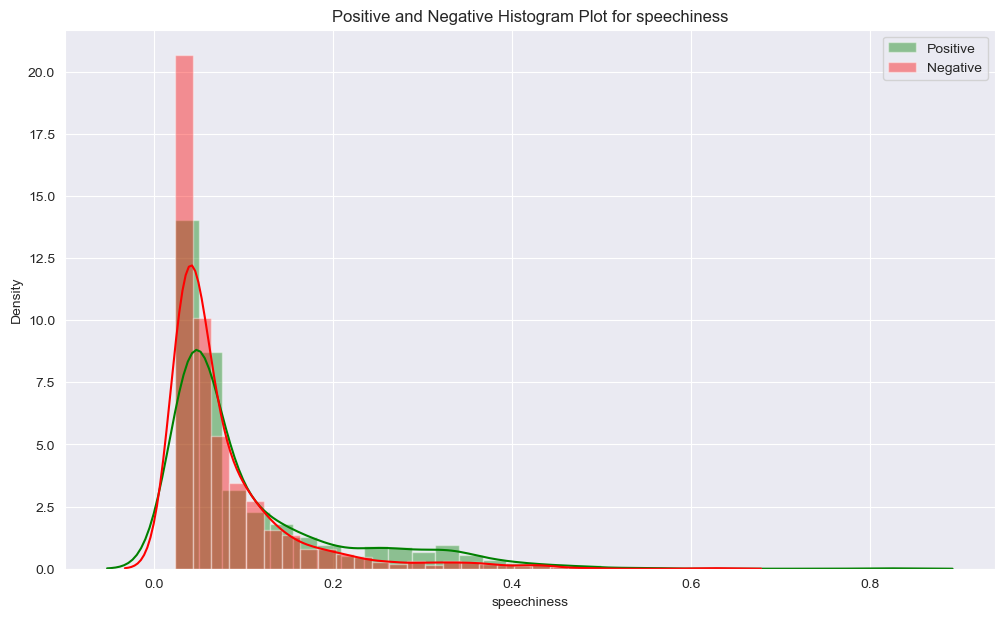

/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_data, bins=30, label='Positive', color='green') #hist
/Users/karunwiokikioluwa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/j6/xs56jvds0m7414064mk0p72c0000gn/T/ipykernel_10093/1405971599.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

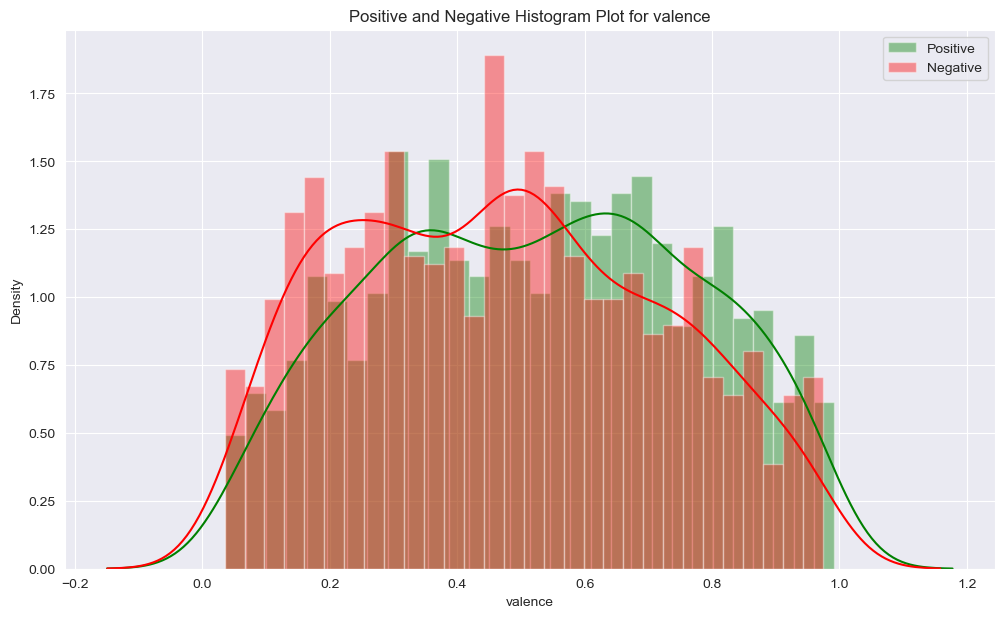

In [12]:
interest_features_cols= ['tempo','acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness','liveness', 'loudness','speechiness','valence']
for feature_cols in interest_features_cols:
    pos_data=df[df['target']==1][feature_cols]
    neg_data=df[df['target']==0][feature_cols]

    plt.figure(figsize=(12,7))

    sns.distplot(pos_data, bins=30, label='Positive', color='green') #hist
    sns.distplot(neg_data, bins=30, label='Negative', color='red')  #hist

    plt.legend(loc='upper right')
    plt.title(f'Positive and Negative Histogram Plot for {feature_cols}')
    plt.show()